In [ ]:
!unzip /content/drive/MyDrive/data.zip

Archive:  /content/drive/MyDrive/data.zip
   creating: data/
   creating: data/2019/
   creating: data/2019/april/
  inflating: data/2019/april/calendar.csv  
  inflating: data/2019/april/desktop.ini  
  inflating: data/2019/april/listings.csv  
  inflating: data/2019/april/listings0.csv  
  inflating: data/2019/april/neighbourhoods.csv  
  inflating: data/2019/april/neighbourhoods.geojson  
  inflating: data/2019/april/reviews.csv  
  inflating: data/2019/april/reviews0.csv  
  inflating: data/2019/desktop.ini   
   creating: data/2019/febrouary/
  inflating: data/2019/febrouary/calendar.csv  
  inflating: data/2019/febrouary/desktop.ini  
  inflating: data/2019/febrouary/listings.csv  
  inflating: data/2019/febrouary/listings0.csv  
  inflating: data/2019/febrouary/neighbourhoods.csv  
  inflating: data/2019/febrouary/neighbourhoods.geojson  
  inflating: data/2019/febrouary/reviews.csv  
  inflating: data/2019/febrouary/reviews0.csv  
   creating: data/2019/march/
  inflating: data

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import sys
import transformers
from transformers import pipeline
import string
import re
import nltk
import timeit
from sklearn.model_selection import train_test_split

#Text cleaning

In [2]:
#@title english stopwords
stopEnglish = ["'ll", "'tis", "'twas", "'ve", '10', '39', 'a', "a's", 'able', 'ableabout', 'about', 'above', 'abroad', 'abst', 'accordance', 'according', 'accordingly', 'across', 'act', 'actually', 'ad', 'added', 'adj', 'adopted', 'ae', 'af', 'affected', 'affecting', 'affects', 'after', 'afterwards', 'ag', 'again', 'against', 'ago', 'ah', 'ahead', 'ai', "ain't", 'aint', 'al', 'all', 'allow', 'allows', 'almost', 'alone', 'along', 'alongside', 'already', 'also', 'although', 'always', 'am', 'amid', 'amidst', 'among', 'amongst', 'amoungst', 'amount', 'an', 'and', 'announce', 'another', 'any', 'anybody', 'anyhow', 'anymore', 'anyone', 'anything', 'anyway', 'anyways', 'anywhere', 'ao', 'apart', 'apparently', 'appear', 'appreciate', 'appropriate', 'approximately', 'aq', 'ar', 'are', 'area', 'areas', 'aren', "aren't", 'arent', 'arise', 'around', 'arpa', 'as', 'aside', 'ask', 'asked', 'asking', 'asks', 'associated', 'at', 'au', 'auth', 'available', 'aw', 'away', 'awfully', 'az', 'b', 'ba', 'back', 'backed', 'backing', 'backs', 'backward', 'backwards', 'bb', 'bd', 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before', 'beforehand', 'began', 'begin', 'beginning', 'beginnings', 'begins', 'behind', 'being', 'beings', 'believe', 'below', 'beside', 'besides', 'best', 'better', 'between', 'beyond', 'bf', 'bg', 'bh', 'bi', 'big', 'bill', 'billion', 'biol', 'bj', 'bm', 'bn', 'bo', 'both', 'bottom', 'br', 'brief', 'briefly', 'bs', 'bt', 'but', 'buy', 'bv', 'bw', 'by', 'bz', 'c', "c'mon", "c's", 'ca', 'call', 'came', 'can', "can't", 'cannot', 'cant', 'caption', 'case', 'cases', 'cause', 'causes', 'cc', 'cd', 'certain', 'certainly', 'cf', 'cg', 'ch', 'changes', 'ci', 'ck', 'cl', 'clear', 'clearly', 'click', 'cm', 'cmon', 'cn', 'co', 'co.', 'com', 'come', 'comes', 'computer', 'con', 'concerning', 'consequently', 'consider', 'considering', 'contain', 'containing', 'contains', 'copy', 'corresponding', 'could', "could've", 'couldn', "couldn't", 'couldnt', 'course', 'cr', 'cry', 'cs', 'cu', 'currently', 'cv', 'cx', 'cy', 'cz', 'd', 'dare', "daren't", 'darent', 'date', 'de', 'dear', 'definitely', 'describe', 'described', 'despite', 'detail', 'did', 'didn', "didn't", 'didnt', 'differ', 'different', 'differently', 'directly', 'dj', 'dk', 'dm', 'do', 'does', 'doesn', "doesn't", 'doesnt', 'doing', 'don', "don't", 'done', 'dont', 'doubtful', 'down', 'downed', 'downing', 'downs', 'downwards', 'due', 'during', 'dz', 'e', 'each', 'early', 'ec', 'ed', 'edu', 'ee', 'effect', 'eg', 'eh', 'eight', 'eighty', 'either', 'eleven', 'else', 'elsewhere', 'empty', 'end', 'ended', 'ending', 'ends', 'enough', 'entirely', 'er', 'es', 'especially', 'et', 'et-al', 'etc', 'even', 'evenly', 'ever', 'evermore', 'every', 'everybody', 'everyone', 'everything', 'everywhere', 'ex', 'exactly', 'example', 'except', 'f', 'face', 'faces', 'fact', 'facts', 'fairly', 'far', 'farther', 'felt', 'few', 'fewer', 'ff', 'fi', 'fifteen', 'fifth', 'fifty', 'fify', 'fill', 'find', 'finds', 'fire', 'first', 'five', 'fix', 'fj', 'fk', 'fm', 'fo', 'followed', 'following', 'follows', 'for', 'forever', 'former', 'formerly', 'forth', 'forty', 'forward', 'found', 'four', 'fr', 'free', 'from', 'front', 'full', 'fully', 'further', 'furthered', 'furthering', 'furthermore', 'furthers', 'fx', 'g', 'ga', 'gave', 'gb', 'gd', 'ge', 'general', 'generally', 'get', 'gets', 'getting', 'gf', 'gg', 'gh', 'gi', 'give', 'given', 'gives', 'giving', 'gl', 'gm', 'gmt', 'gn', 'go', 'goes', 'going', 'gone', 'good', 'goods', 'got', 'gotten', 'gov', 'gp', 'gq', 'gr', 'great', 'greater', 'greatest', 'greetings', 'group', 'grouped', 'grouping', 'groups', 'gs', 'gt', 'gu', 'gw', 'gy', 'h', 'had', "hadn't", 'hadnt', 'half', 'happens', 'hardly', 'has', 'hasn', "hasn't", 'hasnt', 'have', 'haven', "haven't", 'havent', 'having', 'he', "he'd", "he'll", "he's", 'hed', 'hell', 'hello', 'help', 'hence', 'her', 'here', "here's", 'hereafter', 'hereby', 'herein', 'heres', 'hereupon', 'hers', 'herself', 'herse”', 'hes', 'hi', 'hid', 'high', 'higher', 'highest', 'him', 'himself', 'himse”', 'his', 'hither', 'hk', 'hm', 'hn', 'home', 'homepage', 'hopefully', 'how', "how'd", "how'll", "how's", 'howbeit', 'however', 'hr', 'ht', 'htm', 'html', 'http', 'hu', 'hundred', 'i', "i'd", "i'll", "i'm", "i've", 'i.e.', 'id', 'ie', 'if', 'ignored', 'ii', 'il', 'ill', 'im', 'immediate', 'immediately', 'importance', 'important', 'in', 'inasmuch', 'inc', 'inc.', 'indeed', 'index', 'indicate', 'indicated', 'indicates', 'information', 'inner', 'inside', 'insofar', 'instead', 'int', 'interest', 'interested', 'interesting', 'interests', 'into', 'invention', 'inward', 'io', 'iq', 'ir', 'is', 'isn', "isn't", 'isnt', 'it', "it'd", "it'll", "it's", 'itd', 'itll', 'its', 'itself', 'itse”', 'ive', 'j', 'je', 'jm', 'jo', 'join', 'jp', 'just', 'k', 'ke', 'keep', 'keeps', 'kept', 'keys', 'kg', 'kh', 'ki', 'kind', 'km', 'kn', 'knew', 'know', 'known', 'knows', 'kp', 'kr', 'kw', 'ky', 'kz', 'l', 'la', 'large', 'largely', 'last', 'lately', 'later', 'latest', 'latter', 'latterly', 'lb', 'lc', 'least', 'length', 'less', 'lest', 'let', "let's", 'lets', 'li', 'like', 'liked', 'likely', 'likewise', 'line', 'little', 'lk', 'll', 'long', 'longer', 'longest', 'look', 'looking', 'looks', 'low', 'lower', 'lr', 'ls', 'lt', 'ltd', 'lu', 'lv', 'ly', 'm', 'ma', 'made', 'mainly', 'make', 'makes', 'making', 'man', 'many', 'may', 'maybe', "mayn't", 'maynt', 'mc', 'md', 'me', 'mean', 'means', 'meantime', 'meanwhile', 'member', 'members', 'men', 'merely', 'mg', 'mh', 'microsoft', 'might', "might've", "mightn't", 'mightnt', 'mil', 'mill', 'million', 'mine', 'minus', 'miss', 'mk', 'ml', 'mm', 'mn', 'mo', 'more', 'moreover', 'most', 'mostly', 'move', 'mp', 'mq', 'mr', 'mrs', 'ms', 'msie', 'mt', 'mu', 'much', 'mug', 'must', "must've", "mustn't", 'mustnt', 'mv', 'mw', 'mx', 'my', 'myself', 'myse”', 'mz', 'n', 'na', 'name', 'namely', 'nay', 'nc', 'nd', 'ne', 'near', 'nearly', 'necessarily', 'necessary', 'need', 'needed', 'needing', "needn't", 'neednt', 'needs', 'neither', 'net', 'netscape', 'never', 'neverf', 'neverless', 'nevertheless', 'new', 'newer', 'newest', 'next', 'nf', 'ng', 'ni', 'nine', 'ninety', 'nl', 'no', 'no-one', 'nobody', 'non', 'none', 'nonetheless', 'noone', 'nor', 'normally', 'nos', 'not', 'noted', 'nothing', 'notwithstanding', 'novel', 'now', 'nowhere', 'np', 'nr', 'nu', 'null', 'number', 'numbers', 'nz', 'o', 'obtain', 'obtained', 'obviously', 'of', 'off', 'often', 'oh', 'ok', 'okay', 'old', 'older', 'oldest', 'om', 'omitted', 'on', 'once', 'one', "one's", 'ones', 'only', 'onto', 'open', 'opened', 'opening', 'opens', 'opposite', 'or', 'ord', 'order', 'ordered', 'ordering', 'orders', 'org', 'other', 'others', 'otherwise', 'ought', "oughtn't", 'oughtnt', 'our', 'ours', 'ourselves', 'out', 'outside', 'over', 'overall', 'owing', 'own', 'p', 'pa', 'page', 'pages', 'part', 'parted', 'particular', 'particularly', 'parting', 'parts', 'past', 'pe', 'per', 'perhaps', 'pf', 'pg', 'ph', 'pk', 'pl', 'place', 'placed', 'places', 'please', 'plus', 'pm', 'pmid', 'pn', 'point', 'pointed', 'pointing', 'points', 'poorly', 'possible', 'possibly', 'potentially', 'pp', 'pr', 'predominantly', 'present', 'presented', 'presenting', 'presents', 'presumably', 'previously', 'primarily', 'probably', 'problem', 'problems', 'promptly', 'proud', 'provided', 'provides', 'pt', 'put', 'puts', 'pw', 'py', 'q', 'qa', 'que', 'quickly', 'quite', 'qv', 'r', 'ran', 'rather', 'rd', 're', 'readily', 'really', 'reasonably', 'recent', 'recently', 'ref', 'refs', 'regarding', 'regardless', 'regards', 'related', 'relatively', 'research', 'reserved', 'respectively', 'resulted', 'resulting', 'results', 'right', 'ring', 'ro', 'room', 'rooms', 'round', 'ru', 'run', 'rw', 's', 'sa', 'said', 'same', 'saw', 'say', 'saying', 'says', 'sb', 'sc', 'sd', 'se', 'sec', 'second', 'secondly', 'seconds', 'section', 'see', 'seeing', 'seem', 'seemed', 'seeming', 'seems', 'seen', 'sees', 'self', 'selves', 'sensible', 'sent', 'serious', 'seriously', 'seven', 'seventy', 'several', 'sg', 'sh', 'shall', "shan't", 'shant', 'she', "she'd", "she'll", "she's", 'shed', 'shell', 'shes', 'should', "should've", 'shouldn', "shouldn't", 'shouldnt', 'show', 'showed', 'showing', 'shown', 'showns', 'shows', 'si', 'side', 'sides', 'significant', 'significantly', 'similar', 'similarly', 'since', 'sincere', 'site', 'six', 'sixty', 'sj', 'sk', 'sl', 'slightly', 'sm', 'small', 'smaller', 'smallest', 'sn', 'so', 'some', 'somebody', 'someday', 'somehow', 'someone', 'somethan', 'something', 'sometime', 'sometimes', 'somewhat', 'somewhere', 'soon', 'sorry', 'specifically', 'specified', 'specify', 'specifying', 'sr', 'st', 'state', 'states', 'still', 'stop', 'strongly', 'su', 'sub', 'substantially', 'successfully', 'such', 'sufficiently', 'suggest', 'sup', 'sure', 'sv', 'sy', 'system', 'sz', 't', "t's", 'take', 'taken', 'taking', 'tc', 'td', 'tell', 'ten', 'tends', 'test', 'text', 'tf', 'tg', 'th', 'than', 'thank', 'thanks', 'thanx', 'that', "that'll", "that's", "that've", 'thatll', 'thats', 'thatve', 'the', 'their', 'theirs', 'them', 'themselves', 'then', 'thence', 'there', "there'd", "there'll", "there're", "there's", "there've", 'thereafter', 'thereby', 'thered', 'therefore', 'therein', 'therell', 'thereof', 'therere', 'theres', 'thereto', 'thereupon', 'thereve', 'these', 'they', "they'd", "they'll", "they're", "they've", 'theyd', 'theyll', 'theyre', 'theyve', 'thick', 'thin', 'thing', 'things', 'think', 'thinks', 'third', 'thirty', 'this', 'thorough', 'thoroughly', 'those', 'thou', 'though', 'thoughh', 'thought', 'thoughts', 'thousand', 'three', 'throug', 'through', 'throughout', 'thru', 'thus', 'til', 'till', 'tip', 'tis', 'tj', 'tk', 'tm', 'tn', 'to', 'today', 'together', 'too', 'took', 'top', 'toward', 'towards', 'tp', 'tr', 'tried', 'tries', 'trillion', 'truly', 'try', 'trying', 'ts', 'tt', 'turn', 'turned', 'turning', 'turns', 'tv', 'tw', 'twas', 'twelve', 'twenty', 'twice', 'two', 'tz', 'u', 'ua', 'ug', 'uk', 'um', 'un', 'under', 'underneath', 'undoing', 'unfortunately', 'unless', 'unlike', 'unlikely', 'until', 'unto', 'up', 'upon', 'ups', 'upwards', 'us', 'use', 'used', 'useful', 'usefully', 'usefulness', 'uses', 'using', 'usually', 'uucp', 'uy', 'uz', 'v', 'va', 'value', 'various', 'vc', 've', 'versus', 'very', 'vg', 'vi', 'via', 'viz', 'vn', 'vol', 'vols', 'vs', 'vu', 'w', 'want', 'wanted', 'wanting', 'wants', 'was', 'wasn', "wasn't", 'wasnt', 'way', 'ways', 'we', "we'd", "we'll", "we're", "we've", 'web', 'webpage', 'website', 'wed', 'welcome', 'well', 'wells', 'went', 'were', 'weren', "weren't", 'werent', 'weve', 'wf', 'what', "what'd", "what'll", "what's", "what've", 'whatever', 'whatll', 'whats', 'whatve', 'when', "when'd", "when'll", "when's", 'whence', 'whenever', 'where', "where'd", "where'll", "where's", 'whereafter', 'whereas', 'whereby', 'wherein', 'wheres', 'whereupon', 'wherever', 'whether', 'which', 'whichever', 'while', 'whilst', 'whim', 'whither', 'who', "who'd", "who'll", "who's", 'whod', 'whoever', 'whole', 'wholl', 'whom', 'whomever', 'whos', 'whose', 'why', "why'd", "why'll", "why's", 'widely', 'width', 'will', 'willing', 'wish', 'with', 'within', 'without', 'won', "won't", 'wonder', 'wont', 'words', 'work', 'worked', 'working', 'works', 'world', 'would', "would've", 'wouldn', "wouldn't", 'wouldnt', 'ws', 'www', 'x', 'y', 'ye', 'year', 'years', 'yes', 'yet', 'you', "you'd", "you'll", "you're", "you've", 'youd', 'youll', 'young', 'younger', 'youngest', 'your', 'youre', 'yours', 'yourself', 'yourselves', 'youve', 'yt', 'yu', 'z', 'za', 'zero', 'zm', 'z', 'ain', 'daren', 'hadn', 'herse', 'himse', 'itse', 'mayn', 'mightn', 'mon', 'mustn', 'myse', 'needn', 'oughtn', 'shan']

In [ ]:
stop = stopEnglish  # English stopWords

In [ ]:
def text_normalization(df, columnName, removeTags=False):
  # NaN values are replaced with empty string
  df[columnName] = df[columnName].fillna('')

  # Remove URLs
  url_pattern = re.compile(r'https?://\S+|www\.\S+')  #Regex pattern for urls
  def removeURLs(text, replacement_text=''):
      text_without_urls = url_pattern.sub(replacement_text, text)
      return text_without_urls

  df[columnName] = df[columnName].apply(removeURLs)

  if removeTags:  # Needed only in 2023 comments
    br_pattern = re.compile(r'(<|&lt;)br\s*\/*(>|&gt;)')
    def removeBRs(text, replacement_text=''):
      # erase <br>, <br/> etc...
      text_without_brs = br_pattern.sub(replacement_text, text)
      return text_without_brs

    b_pattern = re.compile(r'<\s*\/?\s*b\s*\/?\s*>')
    def removeBs(text, replacement_text=''):
      # erase <b>, </b>, etc...
      text_without_bs = b_pattern.sub(replacement_text, text)
      return text_without_bs

    df[columnName] = df[columnName].apply(removeBRs)
    df[columnName] = df[columnName].apply(removeBs)


  # Define the regular expression to match all non-English characters
  regex = re.compile(r'[^a-zA-Z\s]')

  # Remove all characters except English letters
  df[columnName] = df[columnName].apply(lambda x: regex.sub('', x) if isinstance(x, str) else x)

  # To lowercase
  df[columnName] = df[columnName].str.lower()

  # Remove stopWords
  df[columnName] = df[columnName].apply(lambda x: ' '.join([w for w in x.split() if w not in (stop)]))

  df = df.dropna()

In [ ]:
rev_19_feb = pd.read_csv('data/2019/febrouary/reviews.csv')
rev_19_mar = pd.read_csv('data/2019/march/reviews.csv')
rev_19_apr = pd.read_csv('data/2019/april/reviews.csv')
rev_2019 = pd.concat([rev_19_feb, rev_19_mar, rev_19_apr], ignore_index=True)
rev_2019 = rev_2019[['id', 'comments']]
rev_2019 = rev_2019.drop_duplicates(subset=['comments'])  # no duplicate comments

text_normalization(rev_2019, 'comments')  # clean text

rev_2019.to_csv('drive/MyDrive/comments2019.csv', index=False)

In [ ]:
rev_23_mar = pd.read_csv('data/2023/march/reviews.csv') # All reviews to one file
rev_23_jun = pd.read_csv('data/2023/june/reviews.csv')
rev_23_sep = pd.read_csv('data/2023/september/reviews.csv')
rev_2023 = pd.concat([rev_23_mar, rev_23_jun, rev_23_sep], ignore_index=True)
rev_2023 = rev_2023[['id', 'comments']]
rev_2023 = rev_2023.drop_duplicates(subset=['comments'])  # no duplicate comments

text_normalization(rev_2023, 'comments', True)  # clean text

rev_2023.to_csv('drive/MyDrive/comments2023.csv', index=False)

Διάβασμα των καθαρισμένων δεδομένων

In [ ]:
comm_2019 = pd.read_csv('drive/MyDrive/comments2019.csv')
comm_2023 = pd.read_csv('drive/MyDrive/comments2023.csv', lineterminator='\n')
comm_2019 = comm_2019.dropna()
comm_2023 = comm_2023.dropna()

#Study over time (Ερώτημα 1)

In [ ]:
classifier = pipeline('sentiment-analysis', model="cardiffnlp/twitter-roberta-base-sentiment-latest", tokenizer="cardiffnlp/twitter-roberta-base-sentiment-latest", max_length=512, truncation=True)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

Οι κριτικές έχουν στατιστικά πολύ λίγες αρνητικές κριτικές. Για την αρτιότερη εκπαίδεση του μοντέλου παρακάτω, το βήμα της εκπαίδευσης παρακάτω, φιλτράρουμε ένα μέρος των κριτικών ώστε να περιέχει κάποιες από αυτές τις αρνητικές λέξεις, δηλαδή (πιθανότατα) να είναι αρντική.

In [76]:
negative_words = [
    "dirty", "unfriendly", "unsafe", "inconvenient", "bad", "smelly", "bugs",
    "mold", "damp", "uncomfortable", "faulty", "unreliable",
    "overpriced", "unpleasant", "filthy", "stained",
    "infested", "rude", "leaky", "sticky",
    "cramped", "problematic", "awful", "terrible",
    "horrible", "disgusting", "gross", "dingy", "dreary", "lackluster"
]

# Create a function to check if a review contains any negative words
def contains_negative_words(review):
    return any(word in review for word in negative_words)

2019 - 5000 τυχαίες κριτικές και το πολύ 5000 κριτικές που περιέχουν αρνητικές λέξεις

In [ ]:
sample_2019 = comm_2019.sample(5000)  # 5000 random reviews

# Filter the DataFrame to get only the reviews with negative words
negative_2019 = comm_2019[comm_2019['comments'].apply(contains_negative_words)]
negative_2019 = negative_2019.sample(5000)  # 5000 random bad reviews (not all will actually be bad)

sample_2019.reset_index(inplace=True, drop=True)
negative_2019.reset_index(inplace=True, drop=True)

tic = timeit.default_timer()
res1 = classifier(sample_2019['comments'].to_list())  # get the sentiment of each review
res2 = classifier(negative_2019['comments'].to_list())
toc = timeit.default_timer()

i=0
sample_2019['sentiment'] = ''  # Create column 'sentiment'
negative_2019['sentiment'] = ''
for col in sample_2019.iterrows(): # Assign the label to the column 'sentiment'
  sample_2019['sentiment'].loc[sample_2019['sentiment'].index == i] = res1[i]['label']
  i+=1

i=0
for col in negative_2019.iterrows():  # Create the same column in 'negative' reviews
  negative_2019['sentiment'].loc[negative_2019['sentiment'].index == i] = res2[i]['label']
  i+=1

negative_2019 = negative_2019.loc[negative_2019['sentiment'] == 'negative'] # from negative_2019 (potentially nagative) choose only those that are really negative
sample_2019 = pd.concat([sample_2019, negative_2019], ignore_index=True, sort=False)
sample_2019.to_csv('drive/MyDrive/comments2019_sentiment.csv', index=False)

In [ ]:
print('Time to analyse:', toc - tic)

Time to analyse: 2415.8473699919996


2023 - 5000 τυχαίες κριτικές και το πολύ 5000 κριτικές που περιέχουν αρνητικές λέξεις

In [ ]:
sample_2023 = comm_2023.sample(5000)  # 5000 random reviews

# Filter the DataFrame to get only the reviews with negative words
negative_2023 = comm_2023[comm_2023['comments'].apply(contains_negative_words)]
negative_2023 = negative_2023.sample(5000)  # 5000 random bad reviews (not all will actually be bad)

sample_2023.reset_index(inplace=True, drop=True)
negative_2023.reset_index(inplace=True, drop=True)

tic = timeit.default_timer()
res1 = classifier(sample_2023['comments'].to_list())  # get the sentiment of each review
res2 = classifier(negative_2023['comments'].to_list())
toc = timeit.default_timer()

i=0
sample_2023['sentiment'] = ''  # Create column 'sentiment'
negative_2023['sentiment'] = ''
for col in sample_2023.iterrows(): # Assign the label to the column 'sentiment'
  sample_2023['sentiment'].loc[sample_2023['sentiment'].index == i] = res1[i]['label']
  i+=1

i=0
for col in negative_2023.iterrows():  # Create the same column in 'negative' reviews
  negative_2023['sentiment'].loc[negative_2023['sentiment'].index == i] = res2[i]['label']
  i+=1

negative_2023 = negative_2023.loc[negative_2023['sentiment'] == 'negative'] # from negative_2023 (potentially nagative) choose only those that are really negative
sample_2023 = pd.concat([sample_2023, negative_2023], ignore_index=True, sort=False)
sample_2023.to_csv('drive/MyDrive/comments2023_sentiment.csv', index=False)

In [ ]:
print('Time to analyse:', toc - tic)

Time to analyse: 2321.7323820389993


Διάβασμα αρχείων με επισημειωμένες κριτικές

In [ ]:
sample_2019 = pd.read_csv('drive/MyDrive/comments2019_sentiment.csv')
sample_2023 = pd.read_csv('drive/MyDrive/comments2023_sentiment.csv')

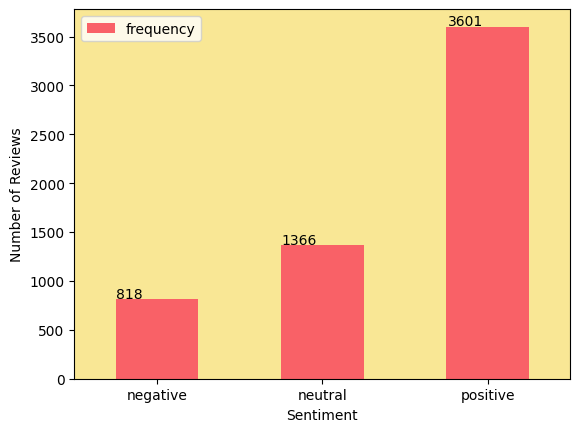

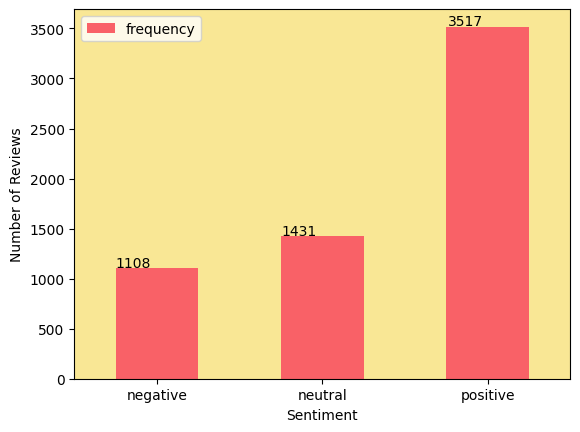

In [ ]:
# Group by 'sentiment' and count occurrences
sentiment_counts_19 = sample_2019.groupby('sentiment').size()
counts_df_19 = pd.DataFrame(sentiment_counts_19, columns=['frequency'])
counts_df_19.reset_index(inplace=True)

sentiment_counts_23 = sample_2023.groupby('sentiment').size()
counts_df_23 = pd.DataFrame(sentiment_counts_23, columns=['frequency'])
counts_df_23.reset_index(inplace=True)

ax = counts_df_19.plot.bar(x='sentiment', y='frequency', rot=0, color='#F96167', xlabel="Sentiment", ylabel="Number of Reviews")
ax.set_facecolor('#F9E795')
ax.legend(loc='upper left')

for p in ax.patches:  # print counts over bars
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

ax = counts_df_23.plot.bar(x='sentiment', y='frequency', rot=0, color='#F96167', xlabel="Sentiment", ylabel="Number of Reviews")
ax.set_facecolor('#F9E795')
ax.legend(loc='upper left')

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

#Sentiment Analysis (Ερώτημα 2)

In [81]:
# Read cleaned data from file
sample_2023 = pd.read_csv('drive/MyDrive/comments2023_sentiment.csv')
sample_2019 = pd.read_csv('drive/MyDrive/comments2019_sentiment.csv')

sample = pd.concat([sample_2023, sample_2019], ignore_index=True, sort=False)
sample.drop_duplicates(subset='id')
sample.shape

(11841, 3)

In [82]:
from sklearn.model_selection import train_test_split
comm_train, comm_test, comm_y_train, comm_y_test = train_test_split(sample['comments'], sample['sentiment'], test_size=0.2, random_state=42)   # split data to a test (20%) and train (80%) files

Υπολογισμός των tf-idf του train  και του test

In [83]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=1.0, min_df=1, max_features=100, stop_words=stopEnglish, ngram_range=(1,1))

tfidf_train = tfidf_vectorizer.fit_transform(comm_train) # Create different tfidf tables
tfidf_test = tfidf_vectorizer.fit_transform(comm_test)

In [84]:
# Tokenization
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

# tokenization: every sentence becomes a list of its words
comm_train = comm_train.apply(nltk.word_tokenize)
comm_test = comm_test.apply(nltk.word_tokenize)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Υπολογισμός των word embeddings: για να χρησιμοποιηθούν αργότερα από τους ταξινομητές, πρέπει να τα μετατρέψουμε σε δισδιάστατα διανύσματα, παίρνοντας τον μέσο όρο των διανυσμάτων των λέξεων σε κάθε πρόταση

In [85]:
from gensim.models import Word2Vec
import gensim

word_embeddings_train = gensim.models.Word2Vec(min_count=1, vector_size=100, window=5)
word_embeddings_test = gensim.models.Word2Vec(min_count=1, vector_size=100, window=5)

word_embeddings_train.build_vocab(comm_train)
word_embeddings_test.build_vocab(comm_test)

word_embeddings_train.train(comm_train, total_examples= len(comm_train), epochs=22)
word_embeddings_test.train(comm_test, total_examples= len(comm_test), epochs=22)

# average vector of a sentence
def average_vector(sentence, model):
    vectors = [model.wv[word] for word in sentence if word in model.wv]
    return np.mean(vectors, axis=0)

word_embeddings_train = np.array([average_vector(sentence, word_embeddings_train) for sentence in comm_train])
word_embeddings_test = np.array([average_vector(sentence, word_embeddings_test) for sentence in comm_test])

Αποθήκευση σε *.pkl αρχεία

In [86]:
import pickle

# create *.pkl files for the tfidf and the word_embeddings of each set of comments
tfidf_train_file = open('drive/MyDrive/tfidf_train.pkl', 'wb')
pickle.dump(tfidf_train, tfidf_train_file)
tfidf_train_file.close()

tfidf_test_file = open('drive/MyDrive/tfidf_test.pkl', 'wb')
pickle.dump(tfidf_test, tfidf_test_file)
tfidf_test_file.close()

word_embeddings_test_file = open('drive/MyDrive/word_emb_test.pkl', 'wb')
pickle.dump(word_embeddings_test, word_embeddings_test_file)
word_embeddings_test_file.close()

word_embeddings_train_file = open('drive/MyDrive/word_emb_train.pkl', 'wb')
pickle.dump(word_embeddings_train, word_embeddings_train_file)
word_embeddings_train_file.close()

Διάβασμα από *.pkl αρχεία

In [87]:
import pickle

# read *.pkl files
tfidf_train_file = open('drive/MyDrive/tfidf_train.pkl', 'rb')
tfidf_train = pickle.load(tfidf_train_file)
tfidf_train_file.close()

tfidf_test_file = open('drive/MyDrive/tfidf_test.pkl', 'rb')
tfidf_test = pickle.load(tfidf_test_file)
tfidf_test_file.close()

word_embeddings_test_file = open('drive/MyDrive/word_emb_test.pkl', 'rb')
word_embeddings_test = pickle.load(word_embeddings_test_file)
word_embeddings_test_file.close()

word_embeddings_train_file = open('drive/MyDrive/word_emb_train.pkl', 'rb')
word_embeddings_train = pickle.load(word_embeddings_train_file)
word_embeddings_train_file.close()

Εκπαίδευση ταξινομητών με χρήση TFIDF

In [89]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier

In [90]:
svm_tfidf = []
rf_tfidf = []
knn_tfidf = []

In [91]:
# SVM, tfidf
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')

# cross validation
cv_scores = cross_val_score(SVM, tfidf_train, comm_y_train, cv=10)
print("results cross validation:", cv_scores)
print("mean:", cv_scores.mean())

SVM.fit(tfidf_train, comm_y_train)
predictions_SVM = SVM.predict(tfidf_test) # predict the labels on validation dataset

svm_tfidf.append(metrics.accuracy_score(comm_y_test, predictions_SVM))
print("Accuracy:", metrics.accuracy_score(comm_y_test, predictions_SVM))
svm_tfidf.append(metrics.precision_score(comm_y_test, predictions_SVM, average='weighted'))
print("Precision:", metrics.precision_score(comm_y_test, predictions_SVM, average='weighted'))
svm_tfidf.append(metrics.recall_score(comm_y_test, predictions_SVM, average='weighted'))
print("Recall:", metrics.recall_score(comm_y_test, predictions_SVM, average='weighted'))
svm_tfidf.append(metrics.f1_score(comm_y_test, predictions_SVM, average='weighted'))
print("F-Measure:", metrics.f1_score(comm_y_test, predictions_SVM, average='weighted'))

svm_tfidf.append(cv_scores.mean())

# print(classification_report(comm_y_test, predictions_SVM))

results cross validation: [0.87974684 0.86708861 0.87117212 0.86694826 0.88701162 0.87328405
 0.87434002 0.86378036 0.89862724 0.87539599]
mean: 0.8757395105128788
Accuracy: 0.5259603208104685
Precision: 0.567509138263666
Recall: 0.5259603208104685
F-Measure: 0.5443162588262914


In [92]:
# Random Forests, tfidf
RFC = RandomForestClassifier()

# cross validation
cv_scores = cross_val_score(RFC, tfidf_train, comm_y_train, cv=10)
print("results cross validation:", cv_scores)
print("mean:", cv_scores.mean())

RFC.fit(tfidf_train, comm_y_train)
predictions_RFC = RFC.predict(tfidf_test) # predict the labels on validation dataset

rf_tfidf.append(metrics.accuracy_score(comm_y_test, predictions_RFC))
print("Accuracy:", metrics.accuracy_score(comm_y_test, predictions_RFC))
rf_tfidf.append(metrics.precision_score(comm_y_test, predictions_RFC, average='weighted'))
print("Precision:", metrics.precision_score(comm_y_test, predictions_RFC, average='weighted'))
rf_tfidf.append(metrics.recall_score(comm_y_test, predictions_RFC, average='weighted'))
print("Recall:", metrics.recall_score(comm_y_test, predictions_RFC, average='weighted'))
rf_tfidf.append(metrics.f1_score(comm_y_test, predictions_RFC, average='weighted'))
print("F-Measure:", metrics.f1_score(comm_y_test, predictions_RFC, average='weighted'))

rf_tfidf.append(cv_scores.mean())

# print(classification_report(comm_y_test, predictions_RFC))

results cross validation: [0.87763713 0.87025316 0.86906019 0.87750792 0.87539599 0.87328405
 0.85955649 0.85110876 0.89440338 0.89017951]
mean: 0.8738386599476918
Accuracy: 0.49472351203039255
Precision: 0.5857808510776923
Recall: 0.49472351203039255
F-Measure: 0.5281868223999869


In [93]:
# KNN, tfidf
KNN = KNeighborsClassifier(n_neighbors=3)

# cross validation
cv_scores = cross_val_score(KNN, tfidf_train, comm_y_train, cv=10)
print("results cross validation:", cv_scores)
print("mean:", cv_scores.mean())

KNN.fit(tfidf_train, comm_y_train)
predictions_KNN = KNN.predict(tfidf_test) # predict the labels on validation dataset

knn_tfidf.append(metrics.accuracy_score(comm_y_test, predictions_KNN))
print("Accuracy:", metrics.accuracy_score(comm_y_test, predictions_KNN))
knn_tfidf.append(metrics.precision_score(comm_y_test, predictions_KNN, average='weighted'))
print("Precision:", metrics.precision_score(comm_y_test, predictions_KNN, average='weighted'))
knn_tfidf.append(metrics.recall_score(comm_y_test, predictions_KNN, average='weighted'))
print("Recall:", metrics.recall_score(comm_y_test, predictions_KNN, average='weighted'))
knn_tfidf.append(metrics.f1_score(comm_y_test, predictions_KNN, average='weighted'))
print("F-Measure:", metrics.f1_score(comm_y_test, predictions_KNN, average='weighted'))

knn_tfidf.append(cv_scores.mean())

# print(classification_report(comm_y_test, predictions_KNN))

results cross validation: [0.83649789 0.80379747 0.82576558 0.81731785 0.81520591 0.78458289
 0.80887012 0.79514256 0.83421331 0.79725449]
mean: 0.8118648051363623
Accuracy: 0.5356690586745462
Precision: 0.5922886517430415
Recall: 0.5356690586745462
F-Measure: 0.5491904566528044


Εκπαίδευση ταξινομητών με χρήση Word embeddings

In [95]:
svm_we = []
rf_we = []
knn_we = []

In [96]:
# SVM, word embeddings
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')

# cross validation
cv_scores = cross_val_score(SVM, word_embeddings_train, comm_y_train, cv=10)
print("results cross validation:", cv_scores)
print("mean:", cv_scores.mean())

SVM.fit(word_embeddings_train, comm_y_train)
predictions_SVM = SVM.predict(word_embeddings_test) # predict the labels on validation dataset

svm_we.append(metrics.accuracy_score(comm_y_test, predictions_SVM))
print("Accuracy:", metrics.accuracy_score(comm_y_test, predictions_SVM))
svm_we.append(metrics.precision_score(comm_y_test, predictions_SVM, average='weighted'))
print("Precision:", metrics.precision_score(comm_y_test, predictions_SVM, average='weighted'))
svm_we.append(metrics.recall_score(comm_y_test, predictions_SVM, average='weighted'))
print("Recall:", metrics.recall_score(comm_y_test, predictions_SVM, average='weighted'))
svm_we.append(metrics.f1_score(comm_y_test, predictions_SVM, average='weighted'))
print("F-Measure:", metrics.f1_score(comm_y_test, predictions_SVM, average='weighted'))

svm_we.append(cv_scores.mean())
# print(classification_report(comm_y_test, predictions_SVM))

results cross validation: [0.89978903 0.90084388 0.90496304 0.88701162 0.90496304 0.88278775
 0.89757128 0.88067582 0.89757128 0.89229145]
mean: 0.8948468180663788
Accuracy: 0.40523427606585055
Precision: 0.41210179557061183
Recall: 0.40523427606585055
F-Measure: 0.38745222002212915


In [98]:
# Random Forests, word embeddings
RFC = RandomForestClassifier()

# cross validation
cv_scores = cross_val_score(RFC, word_embeddings_train, comm_y_train, cv=10)
print("results cross validation:", cv_scores)
print("mean:", cv_scores.mean())

RFC.fit(word_embeddings_train, comm_y_train)
predictions_RFC = RFC.predict(word_embeddings_test) # predict the labels on validation dataset

rf_we.append(metrics.accuracy_score(comm_y_test, predictions_RFC))
print("Accuracy:", metrics.accuracy_score(comm_y_test, predictions_RFC))
rf_we.append(metrics.precision_score(comm_y_test, predictions_RFC, average='weighted'))
print("Precision:", metrics.precision_score(comm_y_test, predictions_RFC, average='weighted'))
rf_we.append(metrics.recall_score(comm_y_test, predictions_RFC, average='weighted'))
print("Recall:", metrics.recall_score(comm_y_test, predictions_RFC, average='weighted'))
rf_we.append(metrics.f1_score(comm_y_test, predictions_RFC, average='weighted'))
print("F-Measure:", metrics.f1_score(comm_y_test, predictions_RFC, average='weighted'))

rf_we.append(cv_scores.mean())
# print(classification_report(comm_y_test, predictions_RFC))

results cross validation: [0.90084388 0.89873418 0.89862724 0.87961985 0.90496304 0.88701162
 0.87750792 0.88067582 0.90707497 0.90073918]
mean: 0.8935797700043219
Accuracy: 0.44195863233431826
Precision: 0.7361553072568873
Recall: 0.44195863233431826
F-Measure: 0.4189206812125523


In [99]:
# KNN, tfidf
KNN = KNeighborsClassifier(n_neighbors=3)

# cross validation
cv_scores = cross_val_score(KNN, word_embeddings_train, comm_y_train, cv=10)
print("results cross validation:", cv_scores)
print("mean:", cv_scores.mean())

KNN.fit(word_embeddings_train, comm_y_train)
predictions_KNN = KNN.predict(word_embeddings_test) # predict the labels on validation dataset

knn_we.append(metrics.accuracy_score(comm_y_test, predictions_KNN))
print("Accuracy:", metrics.accuracy_score(comm_y_test, predictions_KNN))
knn_we.append(metrics.precision_score(comm_y_test, predictions_KNN, average='weighted'))
print("Precision:", metrics.precision_score(comm_y_test, predictions_KNN, average='weighted'))
knn_we.append(metrics.recall_score(comm_y_test, predictions_KNN, average='weighted'))
print("Recall:", metrics.recall_score(comm_y_test, predictions_KNN, average='weighted'))
knn_we.append(metrics.f1_score(comm_y_test, predictions_KNN, average='weighted'))
print("F-Measure:", metrics.f1_score(comm_y_test, predictions_KNN, average='weighted'))

knn_we.append(cv_scores.mean())
# print(classification_report(comm_y_test, predictions_KNN))

results cross validation: [0.87974684 0.87763713 0.88067582 0.85850053 0.87434002 0.85427666
 0.85955649 0.86800422 0.89017951 0.86800422]
mean: 0.8710921453045148
Accuracy: 0.44660194174757284
Precision: 0.540253647429539
Recall: 0.44660194174757284
F-Measure: 0.4631545548306888


Σύγκριση Μεθόδων

In [100]:
df_tfidf = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F-Measure', '10-Fold Cross (mean)'])
df_tfidf.loc[len(df_tfidf)] = svm_tfidf
df_tfidf.loc[len(df_tfidf)] = rf_tfidf
df_tfidf.loc[len(df_tfidf)] = knn_tfidf
indx = ['SVM', 'Random Forests', 'KNN']
df_tfidf.index = indx

df_we = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F-Measure', '10-Fold Cross (mean)'])
df_we.loc[len(df_we)] = svm_we
df_we.loc[len(df_we)] = rf_we
df_we.loc[len(df_we)] = knn_we
df_we.index = indx

Αποτελέσματα εκπαίδευσης με tf-idf

In [101]:
df_tfidf

,Accuracy,Precision,Recall,F-Measure,10-Fold Cross (mean)
SVM,0.525960,0.567509,0.525960,0.544316,0.875740
Random Forests,0.494724,0.585781,0.494724,0.528187,0.873839
KNN,0.535669,0.592289,0.535669,0.549190,0.811865


Αποτελέσματα εκπαίδευσης με word embeddings

In [102]:
df_we

,Accuracy,Precision,Recall,F-Measure,10-Fold Cross (mean)
SVM,0.405234,0.412102,0.405234,0.387452,0.894847
Random Forests,0.441959,0.736155,0.441959,0.418921,0.893580
KNN,0.446602,0.540254,0.446602,0.463155,0.871092


# Similarity (Ερώτημα 3)

In [104]:
# Read cleaned data from file (~11000 reviews)
sample_2023 = pd.read_csv('drive/MyDrive/comments2023_sentiment.csv')
sample_2019 = pd.read_csv('drive/MyDrive/comments2019_sentiment.csv')

sample = pd.concat([sample_2023, sample_2019], ignore_index=True, sort=False)
sample.drop_duplicates(subset='id')
print(sample.shape)

sample = sample['comments']

# Tokenization
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

# tokenization: every sentence becomes a list of its words
sample = sample.apply(nltk.word_tokenize)

# create the word embeddings for all of them
from gensim.models import Word2Vec
import gensim

word_embeddings = gensim.models.Word2Vec(min_count=1, vector_size=100, window=5)
word_embeddings.build_vocab(sample)
word_embeddings.train(sample, total_examples= len(sample), epochs=20)

(11841, 3)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


(4978223, 5556260)

Δημιουργούμε ένα dataframe που, για κάθε ζύγος λέξεων (παίρνουμε τις 500 πιο συχνά χρησιμοποιούμενες) θα περιέχει το similarity τους (500x500)

In [105]:
from gensim.models import Word2Vec
from scipy import spatial

# create a dictionary of each word and its vector representation
word_to_vec = {}
wordList = [] # each word in the vocabulary
for word in word_embeddings.wv.key_to_index:
  word_to_vec[word] = word_embeddings.wv[word]  # add a word:vector element
  wordList.append(word)

# top 500 most used words
from collections import Counter
word_freq = Counter(wordList)
top_500 = word_freq.most_common(500)
top_500 = [word for word, freq in top_500]

# create similarity dataframe (each column is one of the 500 words)
similarities = pd.DataFrame(columns=top_500)

# fill the dataframe row by row
# each row has a word as index, and the similarities as values
for word in top_500:
  cos = []
  for word2 in top_500:
    cos.append(1 - spatial.distance.cosine(word_to_vec[word], word_to_vec[word2]))  # cosine similarity
  similarities.loc[len(similarities)] = cos
similarities.index = top_500  # the words are the index

Συνάρτηση που για 2 δοσμένες λέξεις, τυπώνει 3 διαφορετικές μετρικές σύγκρισης.
Οι λέξεις πρέπει να ανήκουν στο vocablary και αν όχι, επιλέγονται τυχαίες.
Υπάρχει επίσης η δυνατότητα να επιλεγούν τυχαία 2 λέξεις από το vocablary, με τον ορισμό του randomValues=True

In [106]:
def similarity_metrics(word1='apartment', word2='apt', N=2, randomValues=False):
  import random
  if word1 not in top_500:
    word1 = random.choice(top_500)
    print("WARNING: new word selected as word1 ->", word1)
  if word2 not in top_500:
    word2 = random.choice(top_500)
    print("WARNING: new word selected as word2 ->", word2)

  if randomValues:
    word1 = random.choice(top_500)
    word2 = random.choice(top_500)
    print('Selected:', word1, word2);

  # get the semantical neighbourhoods of the 2 words
  N1 = similarities.loc[word1].sort_values(ascending=False) # first the index, then the column
  N1 = N1.head(N+1) # the N+1 most similar words (including word1)
  N1 = N1.drop(N1.index[0]) # remove word1 (similarity = 1)

  N2 = similarities.loc[word2].sort_values(ascending=False) # first the index, then the column
  N2 = N2.head(N+1) # the N+1 most similar words (including word2)
  N2 = N2.drop(N2.index[0]) # remove word2, (similariy = 1)

  maxList = []
  # find the max similarity between word2 and semantic neighbourhood of word1
  for indx, itm in zip(N1.index, N1.to_numpy()):
    maxList.append(similarities.loc[word2, indx])
  # find the max similarity between word1 and semantic neighbourhood of word2
  for indx, itm in zip(N2.index, N2.to_numpy()):
    maxList.append(similarities.loc[word1, indx])
  print("Maximum similarity of neighborhoods:", max(maxList))

  C1_N1 = []
  C1_N2 = []
  C2_N1 = []
  C2_N2 = []
  # find the max similarity between word1 and semantic neighbourhood of word1
  for indx, itm in zip(N1.index, N1.to_numpy()):
    C1_N1.append(similarities.loc[word1, indx])
  # find the max similarity between word1 and semantic neighbourhood of word2
  for indx, itm in zip(N2.index, N2.to_numpy()):
    C1_N2.append(similarities.loc[word1, indx])
  # find the max similarity between word2 and semantic neighbourhood of word1
  for indx, itm in zip(N1.index, N1.to_numpy()):
    C2_N1.append(similarities.loc[word2, indx])
  # find the max similarity between word2 and semantic neighbourhood of word2
  for indx, itm in zip(N2.index, N2.to_numpy()):
    C2_N2.append(similarities.loc[word2, indx])

  pearsonList = []
  from scipy.stats import pearsonr
  b12, _ = pearsonr(C1_N1, C2_N1)
  pearsonList.append(b12)
  b21, _ = pearsonr(C1_N2, C2_N2)
  pearsonList.append(b21)
  print("Correlation of neighborhood similarities:", max(pearsonList))

  sqares = []
  # find the max similarity between word2 and semantic neighbourhood of word1
  for indx, itm in zip(N1.index, N1.to_numpy()):
    sqares.append(pow(similarities.loc[word2, indx], 2))
  # find the max similarity between word1 and semantic neighbourhood of word2
  for indx, itm in zip(N2.index, N2.to_numpy()):
    sqares.append(pow(similarities.loc[word1, indx], 2))

  sum = 0;
  for val in sqares:  # sum of sqares
    sum += val

  import math
  print("Sum of sqared neighborhood similarities:", math.sqrt(sum))

  print('\n')
  # print(N1)
  # print(N2)

In [107]:
similarity_metrics(word1='view', word2='apartment', N=2)
similarity_metrics(word1='view', word2='apartment', N=3)
similarity_metrics(word1='view', word2='apartment', N=4)
similarity_metrics(word1='view', word2='apartment', N=5)
similarity_metrics(word1='view', word2='apartment', N=10)
similarity_metrics(word1='view', word2='apartment', N=20)

Maximum similarity of neighborhoods: 0.43417027592658997
Correlation of neighborhood similarities: 1.0
Sum of sqared neighborhood similarities: 0.8224757682519125


Maximum similarity of neighborhoods: 0.43417027592658997
Correlation of neighborhood similarities: 0.987853079607317
Sum of sqared neighborhood similarities: 0.9366964392503192


Maximum similarity of neighborhoods: 0.4953792691230774
Correlation of neighborhood similarities: 0.9814982545787372
Sum of sqared neighborhood similarities: 1.080976913557477


Maximum similarity of neighborhoods: 0.5852590203285217
Correlation of neighborhood similarities: 0.6095453266686853
Sum of sqared neighborhood similarities: 1.293459423644883


Maximum similarity of neighborhoods: 0.5852590203285217
Correlation of neighborhood similarities: 0.30530817886982126
Sum of sqared neighborhood similarities: 1.7820121665706186


Maximum similarity of neighborhoods: 0.5852590203285217
Correlation of neighborhood similarities: -0.041540153261464985


Παρατηρούμε ότι, όσο αυξάνεται το N:
- το maximum similarity της λέξης 2 με τη γειτονιά της λέξης 1 αυξάνεται ή μένει ίδιο, καθώς περιλαμβάνονται περισσότερες λέξεις που πιθανόν είναι πιο κοντά στην λέξη 2.   
- το cross similarity σταδιακά μειώνεται αφού η συσχέτιση των ομοιοτήτων της λέξης 1 με τη γειτονιά της και τη γειτονιά της λέξης 2 (και αντίστροφα για το άλλο correlation) λογικά μειώνεται όσο προστίθενται κι άλλες, λιγότερο σχετικές λέξεις στην σημασιολογική της γειτονιά.
- το sum of similarities όπως είναι λογικό αυξάνεται, διότι μεγαλώνει η σημασιολογική γειτονιά άρα και οι όροι του αθροίσματος που θα υψωθούν στο τετράγωνο είναι περισσότεροι.

Μερικά ακόμα παραδείγματα:

In [108]:
similarity_metrics(word1='host', word2='downtown', N=6)  # not so related words
similarity_metrics(word1='steps', word2='owners', N=6)  # not so related words

Maximum similarity of neighborhoods: 0.21035200357437134
Correlation of neighborhood similarities: 0.5384767609937511
Sum of sqared neighborhood similarities: 0.4998071367631123


Maximum similarity of neighborhoods: 0.16802217066287994
Correlation of neighborhood similarities: 0.2221516958296707
Sum of sqared neighborhood similarities: 0.45818294898431133




In [109]:
similarity_metrics(word1='apartment', word2='flat', N=6)  # related words (flat is in the neigbourhood of apartment and vice versa)
similarity_metrics(word1='athens', word2='life', N=2)  # related words

Maximum similarity of neighborhoods: 1.0
Correlation of neighborhood similarities: 0.9139855191091691
Sum of sqared neighborhood similarities: 2.595763547207887


Maximum similarity of neighborhoods: 0.7039975523948669
Correlation of neighborhood similarities: 1.0
Sum of sqared neighborhood similarities: 1.1974252684553819




In [110]:
similarity_metrics(N=3, randomValues=True)

Selected: sehr maria
Maximum similarity of neighborhoods: 0.06292630732059479
Correlation of neighborhood similarities: 0.8882404677868931
Sum of sqared neighborhood similarities: 0.08818344710005271


